# Appendix E: TF-IDF, Nested ANOVA, and Regression Analysis Code

In [54]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk import stem
stemmer = stem.PorterStemmer()
from nltk import word_tokenize
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
import string
punct = list(string.punctuation)
from nltk.corpus import words
english_words = set(words.words())
from collections import Counter
import requests
import pandas as pd
import numpy as np

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('words')

import re

import uuid

import gensim.downloader as api
from gensim.models import Word2Vec

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
vectorizer = TfidfVectorizer()

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy import stats

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/christopherusher/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/christopherusher/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/christopherusher/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christopherusher/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/christopherusher/nltk_data...
[nltk_data]   Package words is already up-to-date!


# 1.1 Prepare data

In [4]:
#import policy data
policy_data = pd.read_csv('policy_data.csv', index_col = 0)
policy_data = policy_data.reset_index()

#remove lines with absent data
policy_data_df = policy_data.dropna()

policy_data_df = policy_data_df.reset_index()
policy_data_df

,index,name,class,Region,extraction_date,date,status,title,file,text
0,0,NPPF,Seed document,National,30/04/24,2023.0,Adopted,Planning for climate change,NPPF Planning for climate change,Planning for climate change 158. Plans should ...
1,1,Barking and Dagenham,London boroughs,London,30/04/24,2021.0,Draft,"Sustainable design and construction, Energy, h...",Barking and Dagenhm (LB) - DMSI 1-2.rtf,POLICY DMSI 1: Sustainable design\nand constru...
2,2,Barnet,London boroughs,London,30/04/24,2021.0,Adopted,Mitigating Climate Change,Barnet (LB) - ECC01.rtf,Policy ECC01 – Mitigating Climate Change\nThe ...
3,3,Barnsley Borough Council,Metropolitan districts,Yorkshire/Humber,30/04/24,2019.0,Adopted,"Climate change, Sustainable Design and Constru...","Barnsley (MD) - CC1, CC2.rtf",Policy CC1 Climate Change\nWe will seek to red...
4,4,Bexley,London boroughs,London,30/04/24,2023.0,Adopted,Mitigating and adapting to climate change,Bexley (LB) - SP14.rtf,POLICY SP14 Mitigating and adapting to climate...
...,...,...,...,...,...,...,...,...,...,...
70,73,Waltham Forest,London boroughs,London,30/04/24,2024.0,Adopted,"A Zero Carbon Borough, Sustainable Design and ...","Waltham Forest (LB) - Policy 85, Policy 87.rtf",Policy 85 \nA Zero Carbon Borough \nGreenhouse...
71,74,Wandsworth,London boroughs,London,30/04/24,2022.0,Draft,Responding to the Climate Crisis,Wandworth (LB) - LP10.rtf,LP10 Responding to the Climate Crisis Sustaina...
72,75,Westminster,London boroughs,London,30/04/24,2024.0,Draft,"Energy, Retrofit First","Westminster (LB) - 40, 43.rtf",43. Retrofit First \nPRIORITISING RETROFITTING...
73,76,Wigan Borough Council,Metropolitan districts,North West,30/04/24,2024.0,Adopted,Carbon and Energy,Wigan (MD) - JP-S2.rtf,Policy JP-S2: Carbon and Energy The aim of del...


# 2.1 Tokenize

In [6]:
#Prepare all policy text in 'Text' column of policy_data_df dataframe for tokenization by lowercasing, removing punctuation and 'new line' markers

text = policy_data_df[['text']]
text_ser = text['text'].astype(str)

text_data = text_ser.str.replace(r'[\n0-9]', ' ', regex=True)

lowercased_text = text_data.apply(str.lower)
translator = str.maketrans('', '', string.punctuation)
text_ser_cleaned = lowercased_text.apply(lambda x: x.translate(translator))
  
text_ser_cleaned

0     planning for climate change     plans should t...
1     policy dmsi   sustainable design and construct...
2     policy ecc   – mitigating climate change the c...
3     policy cc  climate change we will seek to redu...
4     policy sp   mitigating and adapting to climate...
                            ...                        
70    policy     a zero carbon borough  greenhouse g...
71    lp   responding to the climate crisis sustaina...
72       retrofit first  prioritising retrofitting o...
73    policy jps  carbon and energy the aim of deliv...
74    policy ws     sustainable construction – energ...
Name: text, Length: 75, dtype: object

In [7]:
#tokenize each entry in the series
text_str = '|SPLIT|'.join(text_ser_cleaned)
text_str = text_str.encode('ascii', 'ignore')
text_str = text_str.decode()
text_str2 = text_str.split('|SPLIT|')
text_ser2 = pd.Series(text_str2)
text_words = [word_tokenize(i) for i in text_ser2]
policy_series = pd.Series(text_words)

#remove stops
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stops]
tokenized_policy_series = policy_series.apply(remove_stopwords)

#remove non-english words like acronyms
def filter_non_english(tokens):
    return [word for word in tokens if word in english_words]
cleaned_policy_series = tokenized_policy_series.apply(filter_non_english)

cleaned_policy_series

0     [climate, change, take, approach, climate, cha...
1     [policy, sustainable, design, construction, de...
2     [policy, climate, change, council, seek, contr...
3     [policy, climate, change, seek, reduce, adapt,...
4     [policy, climate, change, council, actively, p...
                            ...                        
70    [policy, zero, carbon, borough, greenhouse, ga...
71    [climate, crisis, sustainable, construction, d...
72    [first, demolition, development, adopt, approa...
73    [policy, carbon, energy, aim, carbon, neutral,...
74    [policy, sustainable, construction, energy, ef...
Length: 75, dtype: object

# 2.2 Lemmatize

In [8]:
# Function to convert NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [10]:
#Apply lematizer to recide all words to lemmas
def lemmatize_tokens(tokens):
    pos_tags = nltk.pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in pos_tags]
    return lemmatized_tokens

policy_lemmas_series = cleaned_policy_series.apply(lemmatize_tokens)
policy_lemmas_series

0     [climate, change, take, approach, climate, cha...
1     [policy, sustainable, design, construction, de...
2     [policy, climate, change, council, seek, contr...
3     [policy, climate, change, seek, reduce, adapt,...
4     [policy, climate, change, council, actively, p...
                            ...                        
70    [policy, zero, carbon, borough, greenhouse, ga...
71    [climate, crisis, sustainable, construction, d...
72    [first, demolition, development, adopt, approa...
73    [policy, carbon, energy, aim, carbon, neutral,...
74    [policy, sustainable, construction, energy, ef...
Length: 75, dtype: object

In [17]:
#combine token and lemma data with master dataframe
text_cleaned = pd.DataFrame({'Tokens': cleaned_policy_series, 'Lemmas': policy_lemmas_series})
policy_corpus = (pd.concat([policy_data_df, text_cleaned], axis=1))

# 3.1 TF-IDF Vectorizing

In [12]:
#convert eahc entry in the lemmas series from tokenized lemmas to strings to prepare for TF-IDF comparison of documents
policy_series = policy_lemmas_series.apply(lambda tokens: ' '.join(tokens))

In [13]:
#Use TF-IDF to calcuate a vector representation for each word in the overall corpus of policy text
tfidf_matrix = vectorizer.fit_transform(policy_series)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df

,ability,able,absolute,accept,acceptable,access,accessibility,accessible,accommodate,accommodation,...,work,working,worse,would,write,year,young,yr,zero,zone
0,0.000000,0.0,0.000000,0.0,0.114267,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.097204,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.092388,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.041390,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.066359,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.044297,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.037326,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.074749,0.0
71,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.088498,0.0,0.0,0.0,0.000000,0.053345,0.0
72,0.000000,0.0,0.177448,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.035276,0.0,0.0,0.0,0.000000,0.042527,0.0
73,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.035163,0.0


In [55]:
#Produce lists of most representative words for each document - long list so put into text:

#for index, row in tfidf_df.iterrows():
#    print(f"Document {index+1} Top Terms:")
#    print(row.sort_values(ascending=False).head(10))
#    print("\n")

# 4.1 Variation from baseline document

In [14]:
#define the baseline vector
NPPF_baseline = policy_series.iloc[0]
baseline_vector = vectorizer.transform([NPPF_baseline])

In [15]:
#calculate variation from baseline figures by subtracting cosine similarites in tf-idf matrix from 1.
similarities = cosine_similarity(tfidf_matrix, baseline_vector)
variations = 1 - similarities

variations_df = pd.DataFrame(variations, columns=['Variation_from_baseline'])
variations_df

,Variation_from_baseline
0,-2.220446e-16
1,7.384385e-01
2,7.266697e-01
3,7.629997e-01
4,7.478648e-01
...,...
70,7.323189e-01
71,7.209991e-01
72,8.206125e-01
73,6.364723e-01


In [19]:
#Concatinate variation figures with wider corpus
policy_variation_corpus = (pd.concat([policy_corpus, variations_df], axis=1))
policy_variation_corpus = policy_variation_corpus.reset_index(drop=True)
policy_variation_corpus = policy_variation_corpus.drop(index=0)
policy_variation_corpus = policy_variation_corpus.reset_index(drop=True)

# 4.2 Nested ANOVA: policy documentation variation from baseline clustered by region

In [25]:
#Cluster figurs based on region then apply nested ANOVA model 
model = ols('Variation_from_baseline ~ C(Region)', data=policy_variation_corpus).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Region),0.110262,9.0,2.831395,0.007226
Residual,0.276926,64.0,NaN,NaN


In [26]:
#Calcualte mean variation for each region
grouped = policy_variation_corpus.groupby('Region')
mean_variations = grouped['Variation_from_baseline'].mean()
mean_variations_df = mean_variations.reset_index()
mean_variations_df.columns = ['Region', 'Mean_Variation']
mean_variations_df

,Region,Mean_Variation
0,East Midlands,0.769056
1,Greater Manchester,0.678525
2,Liverpool,0.759776
3,London,0.765331
4,Newcastle,0.773697
5,North West,0.636472
6,South East,0.742289
7,South West,0.634756
8,West Midlands,0.719480
9,Yorkshire/Humber,0.779495


In [27]:
#Calcualte range for regional mean variation figures
min_value = min(mean_variations)
max_value = max(mean_variations)
range_value = max_value - min_value
range_value

0.1447390581038468

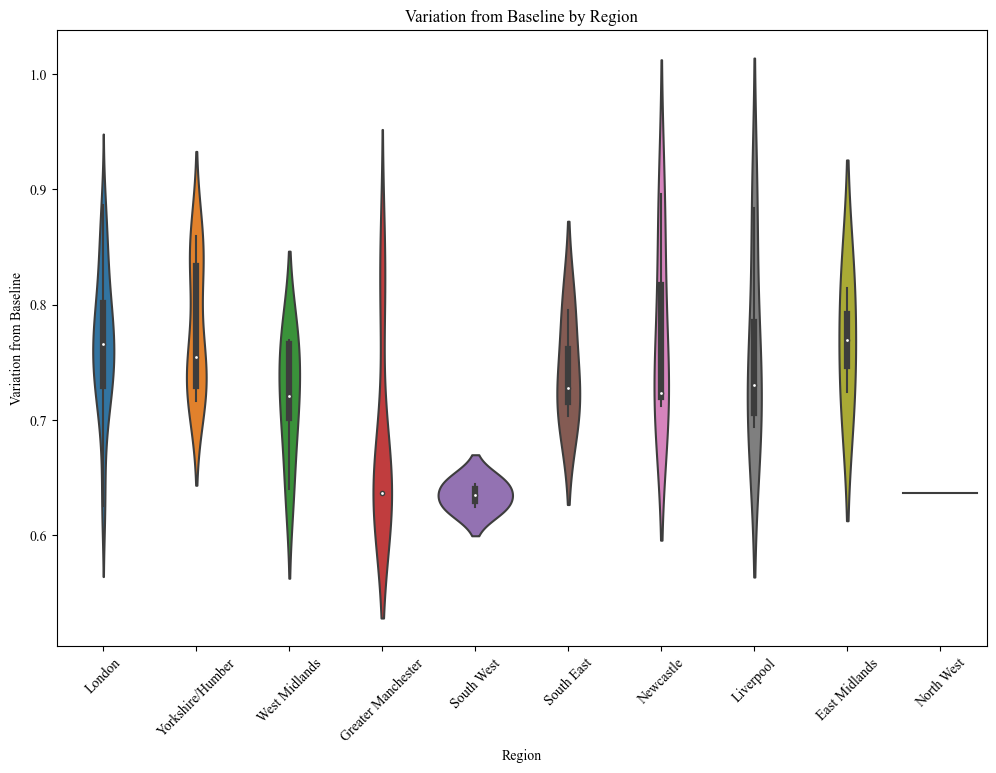

In [28]:
#Plot findings in violin chart
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(12, 8))
sns.violinplot(x='Region', y='Variation_from_baseline', data=policy_variation_corpus)
plt.title('Variation from Baseline by Region')
plt.xlabel('Region')
plt.ylabel('Variation from Baseline')
plt.xticks(rotation=45)
plt.show()

# 4.3 Mutiple regression analysis: impact and determination of statistical significance of a variety of variables on variation from baseline within London sample

In [29]:
london_boroughs_df1 = policy_variation_corpus[policy_variation_corpus['class'].str.contains('London boroughs', case=False, na=False)]
#london_boroughs_df1.to_csv('london_borough_corpus.csv', index=False)

In [35]:
london_borough_corpus = pd.read_csv('london_borough_corpus_data.csv', index_col = 0)
london_borough_select = london_borough_corpus.drop(columns=['name', 'class', 'Region', 'extraction_date', 'status', 'title', 'file', 'text', 'Tokens', 'Lemmas'])

In [36]:
#Calculation London range
min_value = london_borough_select['Variation_from_baseline'].min()
max_value = london_borough_select['Variation_from_baseline'].max()
range_value_london = max_value - min_value
range_value_london

0.26103284106392466

In [37]:
#Calculation National range
min_value = policy_variation_corpus['Variation_from_baseline'].min()
max_value = policy_variation_corpus['Variation_from_baseline'].max()

range_value_all = max_value - min_value
range_value_all

0.2709377768659609

In [38]:
#code all categorial variables into bool formation Y/N in seperate columns
coded_df = pd.get_dummies(london_borough_select, columns=['Political_party_when_adopted_or_drafted'])
coded_df = coded_df.drop(columns=['Political_party_when_adopted_or_drafted_Labour'])
coded_df2 = pd.get_dummies(coded_df, columns=['Thames_future_flood_risk'])
coded_df2 = coded_df2.drop(columns = ['Thames_future_flood_risk_Low'])
coded_df3 = pd.get_dummies(coded_df2, columns=['Relative_vulnerability_to_heat'])
coded_df3 = coded_df3.drop(columns=['Relative_vulnerability_to_heat_Low'])

In [39]:
print(coded_df3.dtypes)
#coded_df3

date                                                            int64
Variation_from_baseline                                       float64
climate_action_scorecard_score                                float64
Political_party_when_adopted_or_drafted_Conservative             bool
Political_party_when_adopted_or_drafted_Independent              bool
Political_party_when_adopted_or_drafted_Liberal_Democrats        bool
Political_party_when_adopted_or_drafted_No_overall_control       bool
Thames_future_flood_risk_High                                    bool
Thames_future_flood_risk_Moderate                                bool
Relative_vulnerability_to_heat_High                              bool
Relative_vulnerability_to_heat_Moderate                          bool
dtype: object


In [40]:
#Covert all bool values into binary 1-0 integers to faciliate regression
coded_df3['Political_party_when_adopted_or_drafted_Independent'] = coded_df3['Political_party_when_adopted_or_drafted_Independent'].astype(int)
coded_df3['Political_party_when_adopted_or_drafted_Conservative'] = coded_df3['Political_party_when_adopted_or_drafted_Conservative'].astype(int)
coded_df3['Political_party_when_adopted_or_drafted_Liberal_Democrats'] = coded_df3['Political_party_when_adopted_or_drafted_Liberal_Democrats'].astype(int)
coded_df3['Political_party_when_adopted_or_drafted_No_overall_control'] = coded_df3['Political_party_when_adopted_or_drafted_No_overall_control'].astype(int)

coded_df3['Thames_future_flood_risk_High'] = coded_df3['Thames_future_flood_risk_High'].astype(int)
coded_df3['Thames_future_flood_risk_Moderate'] = coded_df3['Thames_future_flood_risk_Moderate'].astype(int)

coded_df3['Relative_vulnerability_to_heat_High'] = coded_df3['Relative_vulnerability_to_heat_High'].astype(int)
coded_df3['Relative_vulnerability_to_heat_Moderate'] = coded_df3['Relative_vulnerability_to_heat_Moderate'].astype(int)

In [44]:
#Produce correlation matrix to identify linear relationships between pairs of variables
correlation_matrix = coded_df3.corr()
print(correlation_matrix['Variation_from_baseline'].sort_values(ascending=False))

Variation_from_baseline                                       1.000000
Relative_vulnerability_to_heat_High                           0.216081
Political_party_when_adopted_or_drafted_Independent           0.210121
Political_party_when_adopted_or_drafted_Conservative          0.127846
Thames_future_flood_risk_High                                 0.094359
climate_action_scorecard_score                                0.029136
Political_party_when_adopted_or_drafted_No_overall_control    0.028526
Relative_vulnerability_to_heat_Moderate                      -0.078389
date                                                         -0.188297
Political_party_when_adopted_or_drafted_Liberal_Democrats    -0.233658
Thames_future_flood_risk_Moderate                            -0.316585
Name: Variation_from_baseline, dtype: float64


In [47]:
#Conduct regression

#Defining the dependent variable
y = coded_df3['Variation_from_baseline']

#Defining the indepdentend variables 
encoded_vars = ['Political_party_when_adopted_or_drafted', 'Thames_future_flood_risk', 'Relative_vulnerability_to_heat']
encoded_columns = [col for var in encoded_vars for col in coded_df3.columns if var in col]
independent_vars = ['date', 'climate_action_scorecard_score'] + encoded_columns

#Creating matrix of independent variables
X = coded_df3[independent_vars]
X = sm.add_constant(X)

#Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Variation_from_baseline   R-squared:                       0.392
Model:                                 OLS   Adj. R-squared:                  0.116
Method:                      Least Squares   F-statistic:                     1.420
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):              0.236
Time:                             18:08:59   Log-Likelihood:                 53.827
No. Observations:                       33   AIC:                            -85.65
Df Residuals:                           22   BIC:                            -69.19
Df Model:                               10                                         
Covariance Type:                 nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as label

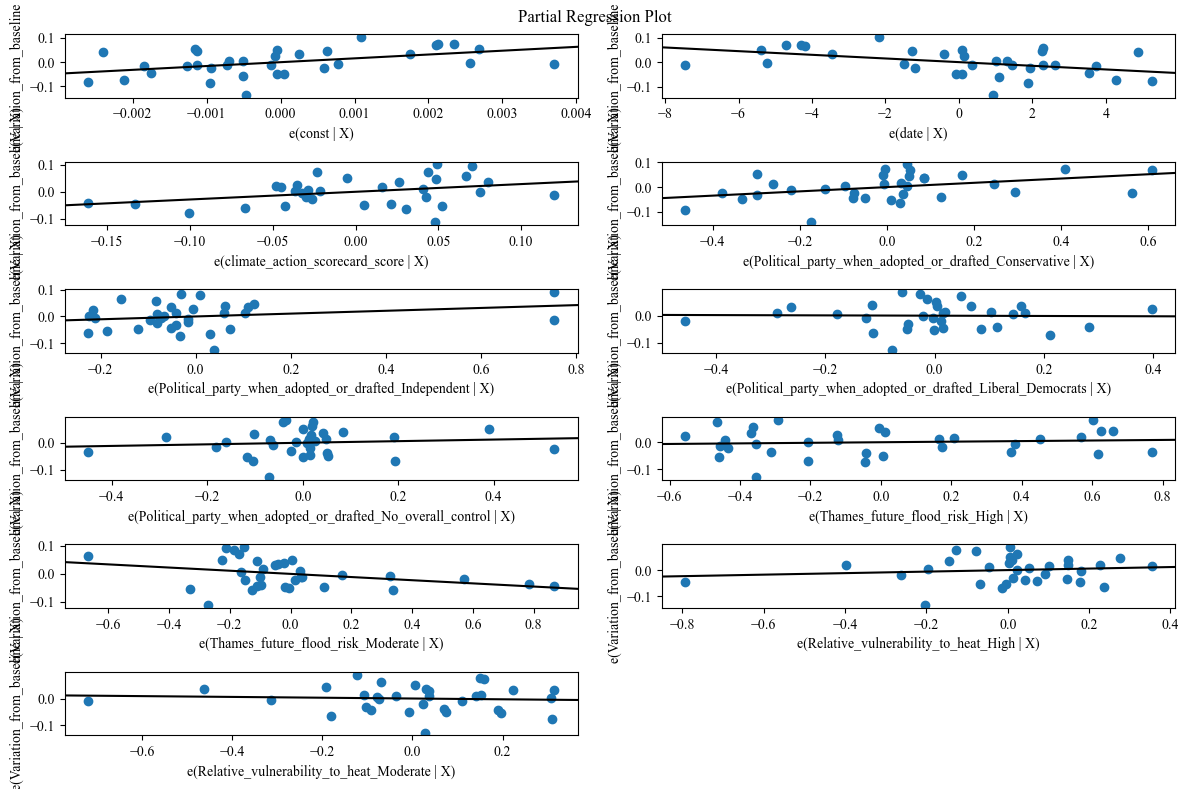

In [49]:
#Produce partial regression plots for all independent variables against the dependent variable
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.show()

In [50]:
#Rename variables to overcome special character issues with plotting module
new_df = coded_df3
new_df.rename(columns={
    'Political_party_when_adopted_or_drafted_Conservative': 'Party_Conservative',
    'Political_party_when_adopted_or_drafted_Independent': 'Party_Independent',
    'Political_party_when_adopted_or_drafted_Liberal_Democrats': 'Party_Liberal_Democrats',
    'Political_party_when_adopted_or_drafted_No_overall_control': 'Party_No_control',
    'Thames_future_flood_risk_High': 'Flood_risk_High',
    'Thames_future_flood_risk_Moderate': 'Flood_risk_Moderate',
    'Relative_vulnerability_to_heat_High': 'Vulnerability_heat_High',
    'Relative_vulnerability_to_heat_Moderate': 'Vulnerability_heat_Moderate'
}, inplace=True)

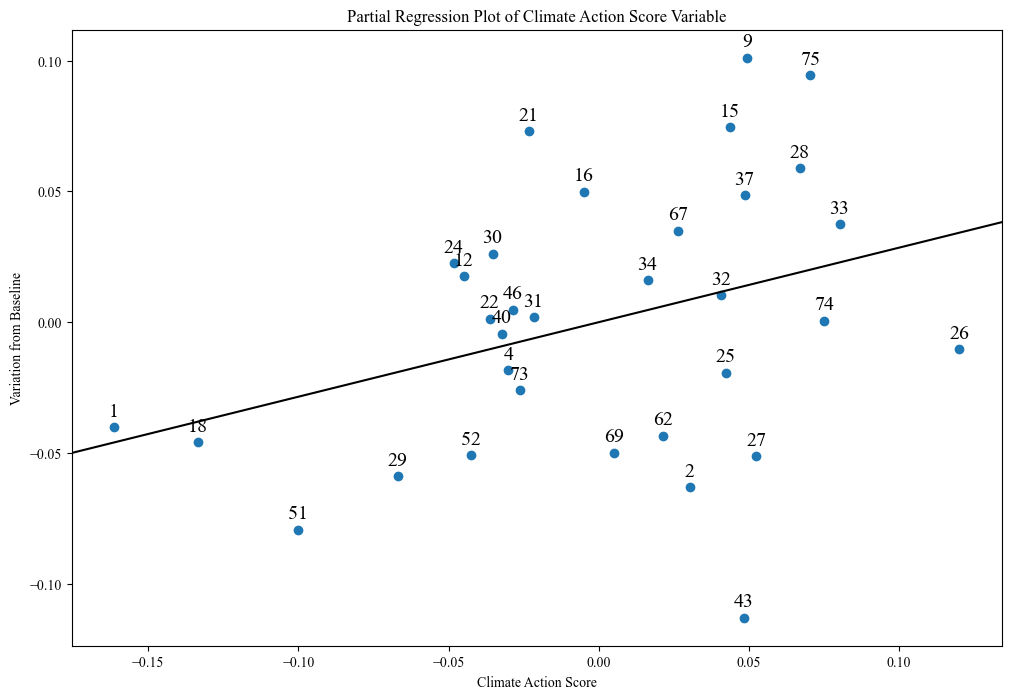

In [51]:
#Combine other variables to isolate climate action score variable 
combined_variables_CAS = ['date', 'Party_Conservative', 
             'Party_Independent', 
             'Party_Liberal_Democrats', 
             'Party_No_control', 
             'Flood_risk_High', 'Flood_risk_Moderate', 
             'Vulnerability_heat_High', 'Vulnerability_heat_Moderate']

#Produce stand alone partioal regression plot for climate action score
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.plot_partregress('Variation_from_baseline', 'climate_action_scorecard_score', 
                             combined_variables_CAS, data=new_df, ax=ax)

#define axes and title
ax.set_xlabel('Climate Action Score')
ax.set_ylabel('Variation from Baseline')
plt.title('Partial Regression Plot of Climate Action Score Variable')
plt.show()

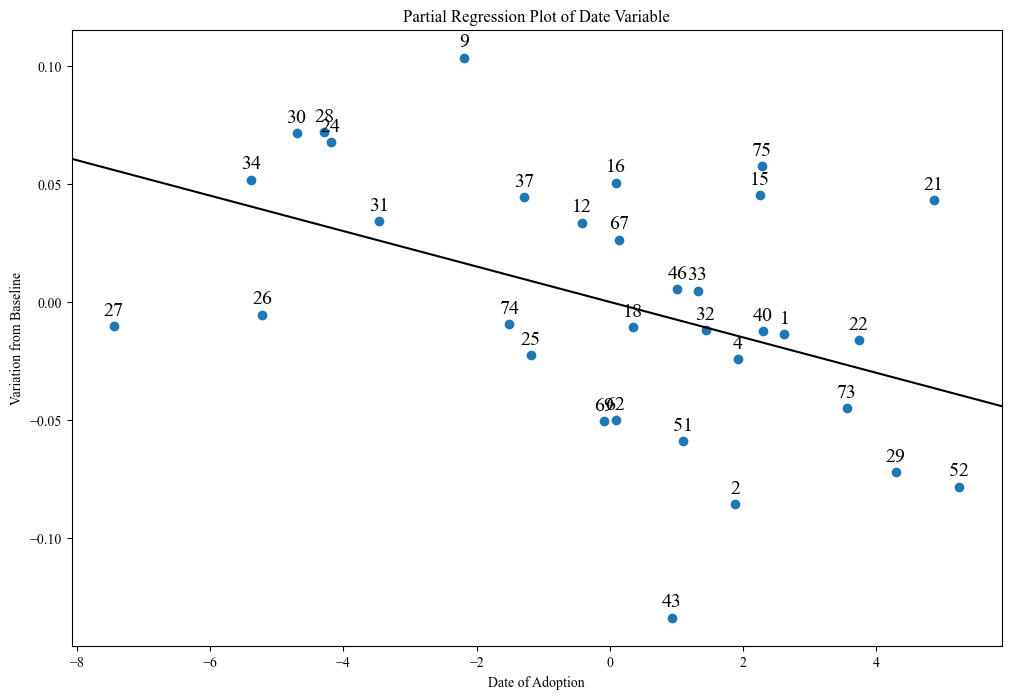

In [52]:
#Combine other variables to isolate date variable 
combined_variables_Date = ['climate_action_scorecard_score', 'Party_Conservative', 
             'Party_Independent', 
             'Party_Liberal_Democrats', 
             'Party_No_control', 
             'Flood_risk_High', 'Flood_risk_Moderate', 
             'Vulnerability_heat_High', 'Vulnerability_heat_Moderate']


#Produce stand alone partioal regression plot for date
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.plot_partregress('Variation_from_baseline', 'date', 
                             combined_variables_Date, data=new_df, ax=ax)

#define axes and title
ax.set_xlabel('Date of Adoption')
ax.set_ylabel('Variation from Baseline')
plt.title('Partial Regression Plot of Date Variable')
plt.show()

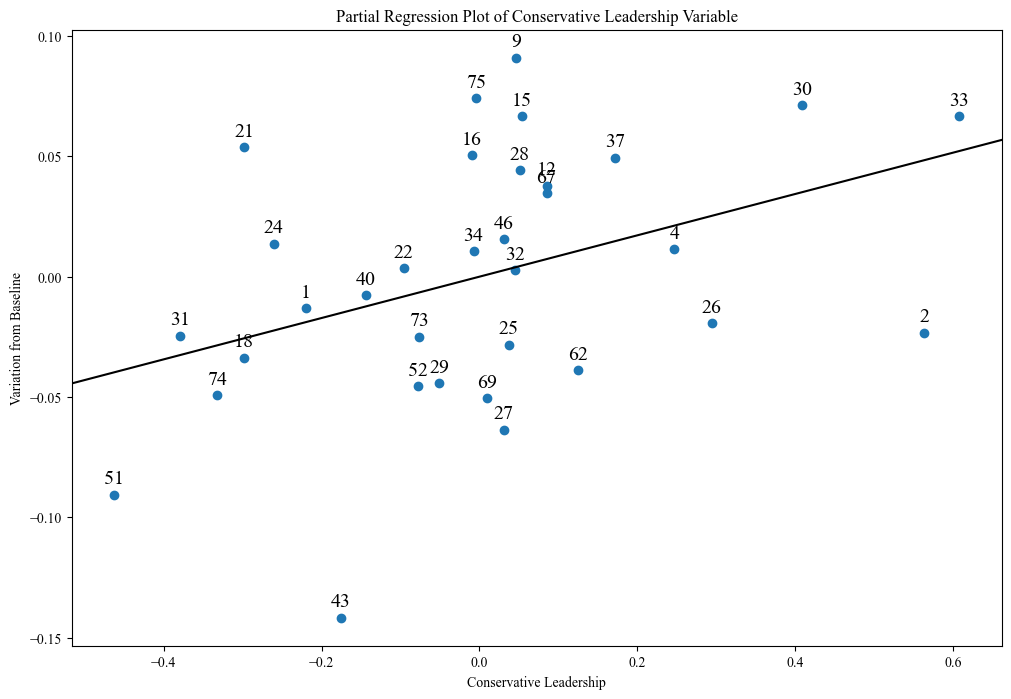

In [53]:
#Combine other variables to isolate Conservative leadership variable 
combined_variables_Tory = ['climate_action_scorecard_score', 'date', 
             'Party_Independent', 
             'Party_Liberal_Democrats', 
             'Party_No_control', 
             'Flood_risk_High', 'Flood_risk_Moderate', 
             'Vulnerability_heat_High', 'Vulnerability_heat_Moderate']

#Produce stand alone partioal regression plot for Conservative leadership
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.plot_partregress('Variation_from_baseline', 'Party_Conservative', 
                             combined_variables_Tory, data=new_df, ax=ax)

#define axes and title
ax.set_xlabel('Conservative Leadership')
ax.set_ylabel('Variation from Baseline')
plt.title('Partial Regression Plot of Conservative Leadership Variable')

plt.show()